# Project name- Predicting Customer Lifetime value for an auto insurance company using Supervised Machine Learning
# Dataset can be downloaded from the below link
https://www.kaggle.com/datasets/somjee/auto-insurance-customerlifetimevalue
# The main aim of this project is to predict the Cutsomer Lifetime value based on various features

# In this project we do the following steps
 1. Finding missing Values
 2. Listing out the Numerical Variables
 3. Distribution of the Numerical Variables
 4. Categorical Variables
 5. Cardinality of Categorical Variables
 6. Encoding
 7. Splitting the data.
 8. Scaling.
 9. Modelling the data
 10. Testing the data.

In [1]:
## First we import the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## to display all the columns of the dataset 
pd.set_option("display.max_columns",None)
## we import our dataset
dataset=pd.read_csv("F:\DATA SETS\CustomerlifetimeValue-copy.csv")

In [2]:
## we check the shape of the data,i.e, the number of rows and columns
dataset.shape

(9134, 24)

In [3]:
## to check the dimension of the data
dataset.ndim

2

In [4]:
## to print the top 5 records of the data
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,69.0,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,NaN,Two-Door Car,Medsize
1,QZ44356,Arizona,NaN,No,NaN,Bachelor,1/31/11,Unemployed,NaN,0.0,Suburban,Single,94.0,13,42,0,8,NaN,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,NaN,2/19/11,Employed,F,NaN,Suburban,Married,NaN,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,NaN,0.0,Suburban,Married,106.0,18,65,0,7,NaN,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02-03-2011,Employed,M,43836.0,Rural,Single,NaN,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,NaN,Four-Door Car,Medsize


In [5]:
## to check whether the data has any null values
dataset.isnull().sum()

Customer                           0
State                              0
Customer Lifetime Value          150
Response                           0
Coverage                         126
Education                        610
Effective To Date                  0
EmploymentStatus                   0
Gender                           131
Income                           148
Location Code                      0
Marital Status                     0
Monthly Premium Auto              96
Months Since Last Claim            0
Months Since Policy Inception      0
Number of Open Complaints          0
Number of Policies                 0
Policy Type                       83
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount               100
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [6]:
## we find the number of numerical features present in the dataset
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]
print("count of numerical features:",len(numerical_features))

count of numerical features: 8


In [7]:
## we see the content of the numerical features
dataset[numerical_features].head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.0,69.0,32,5,0,1,NaN
1,NaN,0.0,94.0,13,42,0,8,1131.464935
2,12887.431650,NaN,NaN,18,38,0,2,566.472247
3,7645.861827,0.0,106.0,18,65,0,7,529.881344
4,2813.692575,43836.0,NaN,12,44,0,1,NaN


In [8]:
## we create a separate variable for the temporal variable
temp_var=dataset["Effective To Date"]
temp_var

0          2/24/11
1          1/31/11
2          2/19/11
3          1/20/11
4       02-03-2011
           ...    
9129    02-10-2011
9130    02-12-2011
9131    02-06-2011
9132    02-03-2011
9133       2/14/11
Name: Effective To Date, Length: 9134, dtype: object

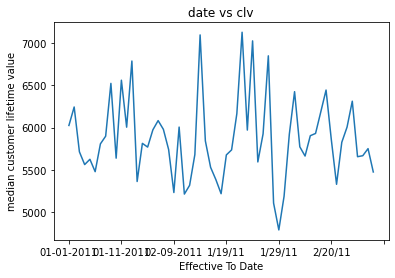

In [9]:
## We try to find if there is any relationship between the temporal variable and the target variable
## We observe that our target variable(CLV) have gone through cyclical fluctuations 
dataset.groupby("Effective To Date")["Customer Lifetime Value"].median().plot()
plt.xlabel("Effective To Date")
plt.ylabel("median customer lifetime value")
plt.title("date vs clv")
plt.show()

In [10]:
## We find the number of discrete numerical features in the dataset
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<20]
print("count of discrete variables :",len(discrete_features))

count of discrete variables : 2


In [11]:
## We print the name of the discrete features
print(discrete_features)

['Number of Open Complaints', 'Number of Policies']


In [12]:
## We print the data in the discrete features 
dataset[discrete_features].head()

,Number of Open Complaints,Number of Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


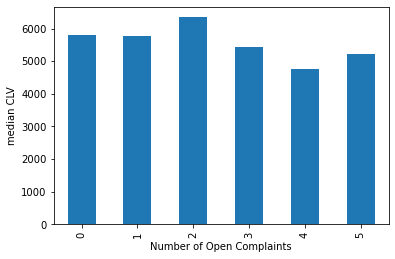

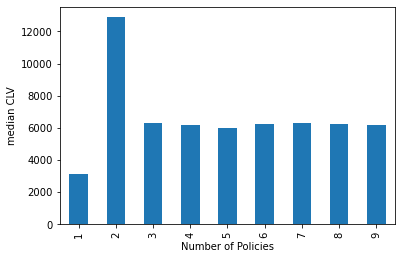

In [13]:
## We plot a barplot to analyze the relationship between the list of discrete features and median_CLV
for feature in discrete_features:
    dataset.groupby(feature)["Customer Lifetime Value"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("median CLV")
    plt.show()

In [14]:
## We find the number of continous numerical features in the dataset
continous_features=[feature for feature in numerical_features if feature not in discrete_features]
print("count of continous features:",len(continous_features))

count of continous features: 6


In [15]:
## We print the name of the continous features
print(continous_features)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']


In [16]:
## We print the data in continous features
dataset[continous_features].head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274.0,69.0,32,5,NaN
1,NaN,0.0,94.0,13,42,1131.464935
2,12887.431650,NaN,NaN,18,38,566.472247
3,7645.861827,0.0,106.0,18,65,529.881344
4,2813.692575,43836.0,NaN,12,44,NaN


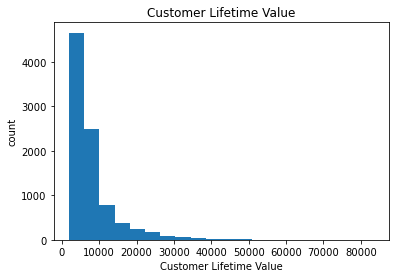

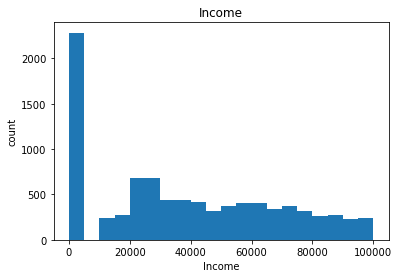

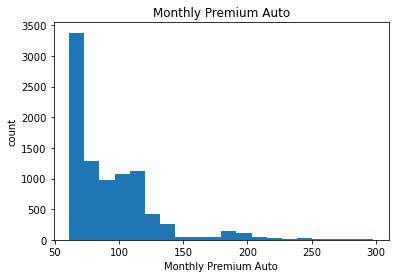

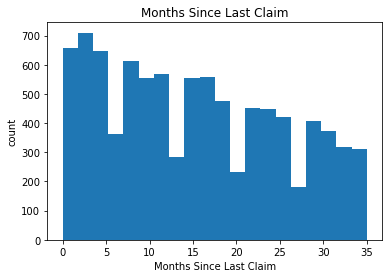

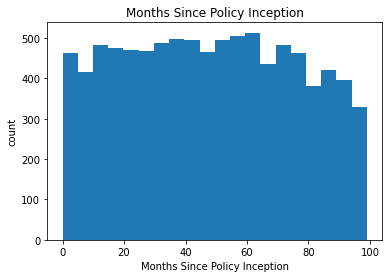

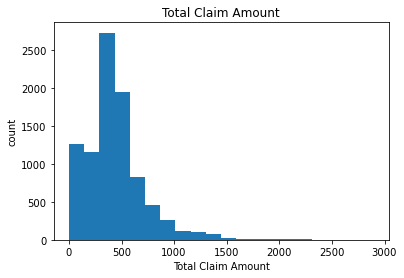

In [17]:
## We plot histograms to find the distribution of the continous features
for feature in continous_features:
    plt.hist(dataset[feature],bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

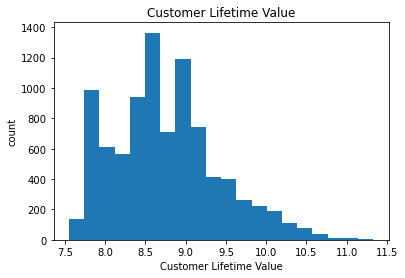

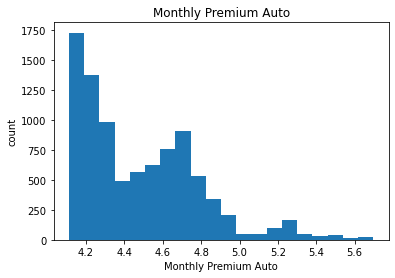

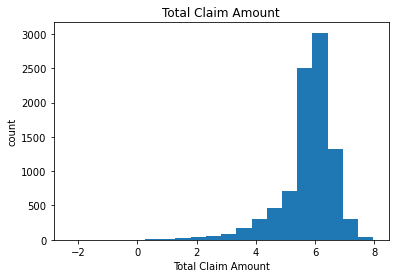

In [18]:
## We observe that the continous features are skewed so we apply logarithmic function to transform them
## only those features are transformed who does not have 0 as a value 
for feature in continous_features:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        plt.hist(dataset[feature],bins=20)
        plt.xlabel(feature)
        plt.ylabel("count")
        plt.title(feature)
        plt.show()

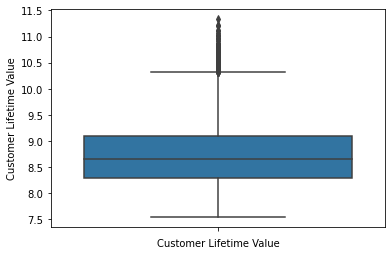

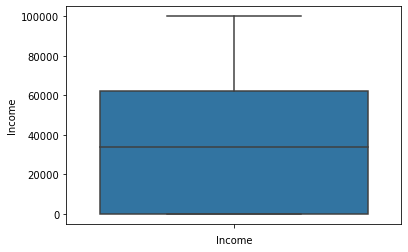

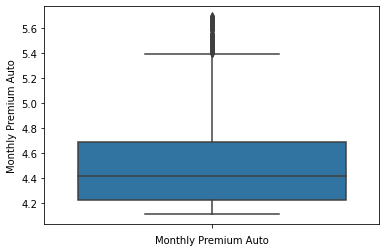

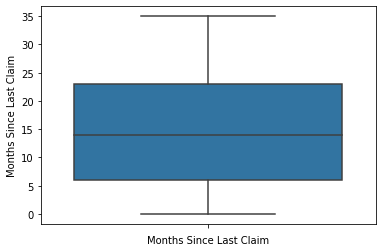

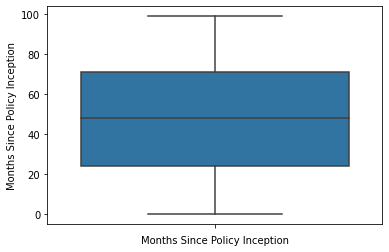

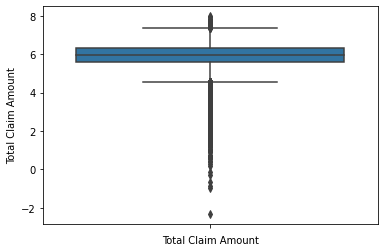

In [19]:
## We make boxplots to find out the presence of outliers in the continous features
for feature in continous_features:
    sns.boxplot(y=dataset[feature])
    plt.xlabel(feature)
    plt.show()

In [20]:
## We find the list of categorical features present in the dataset
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
categorical_features

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [21]:
## We remove the "Customer" column as it is irrelevant
categorical_features.remove("Customer")

In [22]:
## We remove "Effective To Date" column as it is irrelevant to treat it as a categorical feature
categorical_features.remove("Effective To Date")

In [23]:
## Now we print the updated list of categorical features
categorical_features

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [24]:
## We find the number of categorical features present in the dataset
len(categorical_features)

14

In [25]:
## We print the data in the categorical features
dataset[categorical_features].head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,NaN,Bachelor,Unemployed,NaN,Suburban,Single,NaN,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,NaN,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,NaN,Suburban,Married,NaN,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
## We find the cardinality of the categorical features,i.e, the number of sub-categories present in each categorical feature
for feature in categorical_features:
    print("feature is {} and number of sub-categories are {}".format(feature,len(dataset[feature].unique())))

feature is State and number of sub-categories are 5
feature is Response and number of sub-categories are 2
feature is Coverage and number of sub-categories are 4
feature is Education and number of sub-categories are 6
feature is EmploymentStatus and number of sub-categories are 5
feature is Gender and number of sub-categories are 3
feature is Location Code and number of sub-categories are 3
feature is Marital Status and number of sub-categories are 3
feature is Policy Type and number of sub-categories are 4
feature is Policy and number of sub-categories are 9
feature is Renew Offer Type and number of sub-categories are 4
feature is Sales Channel and number of sub-categories are 4
feature is Vehicle Class and number of sub-categories are 6
feature is Vehicle Size and number of sub-categories are 3


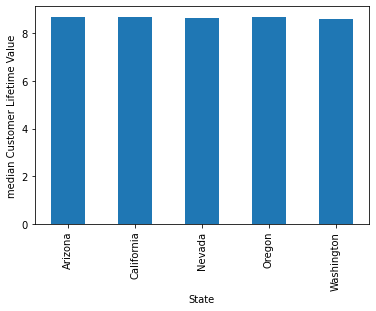

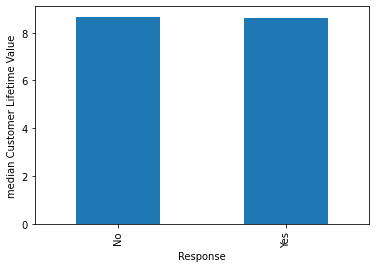

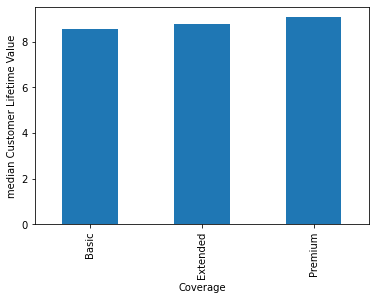

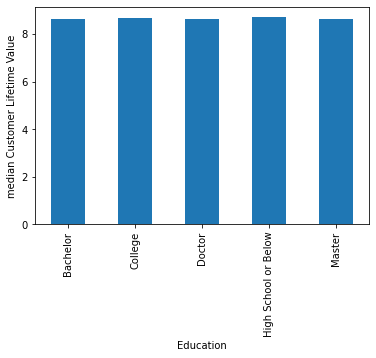

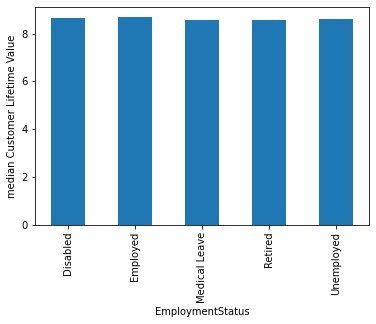

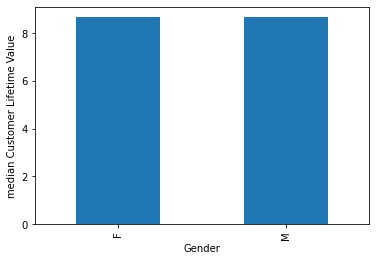

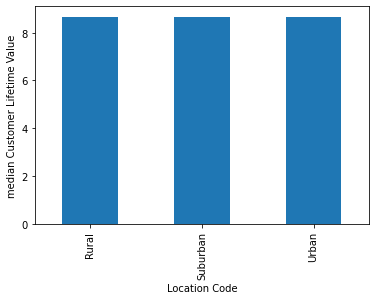

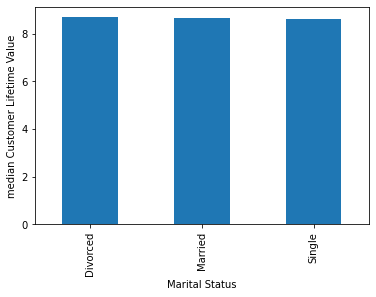

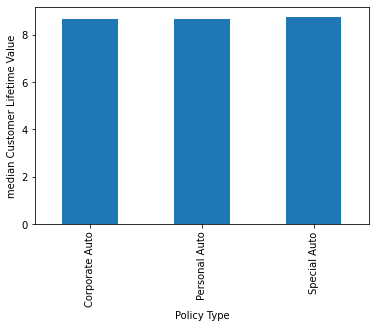

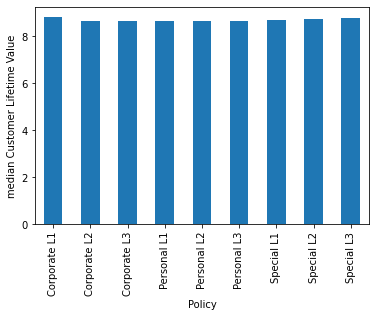

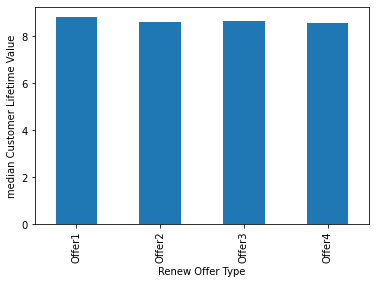

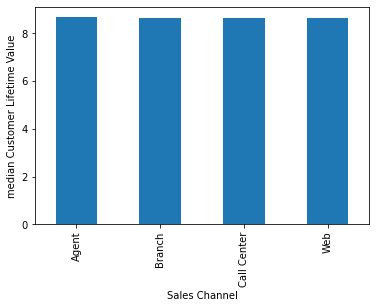

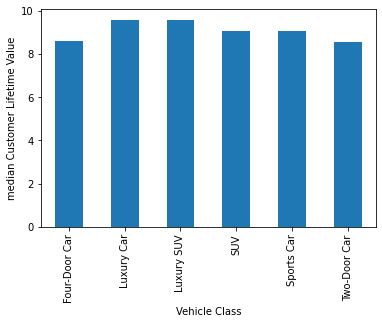

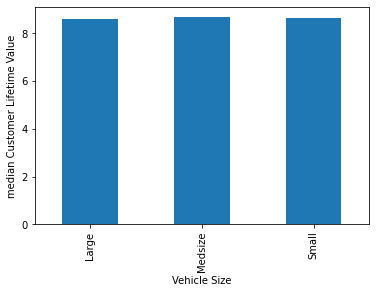

In [27]:
## We plot barplot to observe the relationship between the categorical features and the median of the target variable(CLV)
for feature in categorical_features:
    dataset.groupby(feature)["Customer Lifetime Value"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("median Customer Lifetime Value")
    plt.show()

In [28]:
## We try to find the percentage of missing values present in the categorical features
categorical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=="O"]
for feature in categorical_nan:
    print("{} has {} % missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Coverage has 0.0138 % missing values
Education has 0.0668 % missing values
Gender has 0.0143 % missing values
Policy Type has 0.0091 % missing values


In [29]:
## We fill the nan values in the categorical features with a label named "missing"
dataset[categorical_nan]=dataset[categorical_nan].fillna("missing")
## after replacing the nan values we check the whether there is any nan value present
dataset[categorical_nan].isnull().sum()

Coverage       0
Education      0
Gender         0
Policy Type    0
dtype: int64

In [30]:
## We print the data of the categorical features which had nan values earlier
dataset[categorical_nan].head()

,Coverage,Education,Gender,Policy Type
0,Basic,Bachelor,F,Corporate Auto
1,missing,Bachelor,missing,missing
2,Premium,missing,F,Personal Auto
3,Basic,Bachelor,missing,missing
4,Basic,Bachelor,M,Personal Auto


In [31]:
## We try to find the percentage of missing values present in the numerical features
numerical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!="O"]
for feature in numerical_nan:
    print("{} has {} % missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Customer Lifetime Value has 0.0164 % missing values
Income has 0.0162 % missing values
Monthly Premium Auto has 0.0105 % missing values
Total Claim Amount has 0.0109 % missing values


In [32]:
## as we have observed outliers in the data points of numercial features so we replace the nan values with it's median value
for feature in numerical_nan:
    median_value=dataset[feature].median()
    dataset[feature].fillna(median_value,inplace=True)
dataset[numerical_nan].isnull().sum()

Customer Lifetime Value    0
Income                     0
Monthly Premium Auto       0
Total Claim Amount         0
dtype: int64

In [33]:
## We print the dataset to find out check whether the nan values have been by median or not
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,7.924260,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,4.234107,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,5.950643,Two-Door Car,Medsize
1,QZ44356,Arizona,8.662190,No,missing,Bachelor,1/31/11,Unemployed,missing,0.0,Suburban,Single,4.543295,13,42,0,8,missing,Personal L3,Offer3,Agent,7.031268,Four-Door Car,Medsize
2,AI49188,Nevada,9.464008,No,Premium,missing,2/19/11,Employed,F,33854.0,Suburban,Married,4.418841,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,6.339428,Two-Door Car,Medsize
3,WW63253,California,8.941920,No,Basic,Bachelor,1/20/11,Unemployed,missing,0.0,Suburban,Married,4.663439,18,65,0,7,missing,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize
4,HB64268,Washington,7.942253,No,Basic,Bachelor,02-03-2011,Employed,M,43836.0,Rural,Single,4.418841,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,5.950643,Four-Door Car,Medsize


In [34]:
## We replace the sub categories which are present in less than 10% of the dataset with "rare_var"label 
for feature in categorical_features:
    temp=dataset.groupby(feature)["Customer Lifetime Value"].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],"rare_var")

In [35]:
## We print the dataset to observe the change
dataset.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,7.924260,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,4.234107,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,5.950643,Two-Door Car,Medsize
1,QZ44356,Arizona,8.662190,No,missing,Bachelor,1/31/11,Unemployed,missing,0.0,Suburban,Single,4.543295,13,42,0,8,rare_var,Personal L3,Offer3,Agent,7.031268,Four-Door Car,Medsize
2,AI49188,Nevada,9.464008,No,Premium,missing,2/19/11,Employed,F,33854.0,Suburban,Married,4.418841,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,6.339428,Two-Door Car,Medsize
3,WW63253,California,8.941920,No,Basic,Bachelor,1/20/11,Unemployed,missing,0.0,Suburban,Married,4.663439,18,65,0,7,rare_var,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize
4,HB64268,Washington,7.942253,No,Basic,Bachelor,02-03-2011,Employed,M,43836.0,Rural,Single,4.418841,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,5.950643,Four-Door Car,Medsize
5,OC83172,Oregon,9.018732,Yes,missing,Bachelor,1/25/11,Employed,F,33854.0,Rural,Married,4.234107,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,5.071310,Two-Door Car,Medsize
6,XZ87318,Oregon,8.662190,Yes,Basic,missing,2/24/11,Employed,F,55350.0,Suburban,Married,4.204693,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,5.773309,Four-Door Car,Medsize
7,CF85061,Arizona,8.884070,No,Premium,Master,1/18/11,Unemployed,M,0.0,Urban,Single,4.615121,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,5.894485,Four-Door Car,Medsize
8,DY87989,Oregon,10.091108,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072.0,Suburban,Divorced,4.262680,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,6.236761,Four-Door Car,Medsize
9,BQ94931,Oregon,8.907636,No,Extended,College,2/17/11,Employed,F,28812.0,Urban,Married,4.532599,17,7,0,8,Special Auto,Special L2,Offer2,Branch,6.053330,Four-Door Car,Medsize


In [36]:
## We drop the unnecessary features from the dataset
dataset=dataset.drop(["Customer","Effective To Date"],axis=1)

In [37]:
## We perform one hot encoding on categorical variables
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size']
encoded_array = enc.fit_transform(dataset.loc[:,columns_to_one_hot])
dataset_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
dataset_sklearn_encoded = pd.concat([dataset,dataset_encoded],axis=1)
dataset_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)

In [38]:
## We print the encoded dataset
dataset_sklearn_encoded

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Coverage_missing,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Education_missing,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Gender_missing,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy Type_rare_var,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L2,Policy_Special L3,Policy_rare_var,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,7.924260,56274.0,4.234107,32,5,0,1,5.950643,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,8.662190,0.0,4.543295,13,42,0,8,7.031268,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.464008,33854.0,4.418841,18,38,0,2,6.339428,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,8.941920,0.0,4.663439,18,65,0,7,6.272653,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,7.942253,43836.0,4.418841,12,44,0,1,5.950643,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10.060747,71941.0,4.290459,18,89,0,2,5.950643,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,8.038031,21604.0,4.418841,14,28,0,1,5.938064,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,8.662190,33854.0,4.442651,9,37,3,2,6.673026,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.

In [39]:
## We separate the independent and dependent variables from the dataset
x=dataset_sklearn_encoded.drop("Customer Lifetime Value",axis=1)
y=dataset_sklearn_encoded["Customer Lifetime Value"]

In [40]:
## We print the independent varibale
x

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Coverage_missing,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Education_missing,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Gender_missing,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy Type_rare_var,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L2,Policy_Special L3,Policy_rare_var,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274.0,4.234107,32,5,0,1,5.950643,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,4.543295,13,42,0,8,7.031268,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,33854.0,4.418841,18,38,0,2,6.339428,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,4.663439,18,65,0,7,6.272653,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,43836.0,4.418841,12,44,0,1,5.950643,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941.0,4.290459,18,89,0,2,5.950643,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,21604.0,4.418841,14,28,0,1,5.938064,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,33854.0,4.442651,9,37,3,2,6.673026,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,21941.0,4.418841,34,3,0,3,5.950643,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [41]:
## We print the dependent variable
y=pd.DataFrame(y)
y

,Customer Lifetime Value
0,7.924260
1,8.662190
2,9.464008
3,8.941920
4,7.942253
...,...
9129,10.060747
9130,8.038031
9131,8.662190
9132,8.925912


In [42]:
## We split our data into train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=18)

In [43]:
## We use Standardization method to scale down all the features in the dataset 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [44]:
## We print the transformed x_train
x_train

array([[-0.84738574, -0.80037167,  1.37085601, ..., -0.3397845 ,
        -1.53125   ,  2.02873311],
       [-0.3456954 , -1.19972429, -0.50476854, ..., -0.3397845 ,
        -1.53125   ,  2.02873311],
       [ 0.49780447,  1.12524   , -0.2086173 , ..., -0.3397845 ,
         0.65306122, -0.49291846],
       ...,
       [-1.24238926, -0.28075888, -0.89963687, ..., -0.3397845 ,
         0.65306122, -0.49291846],
       [ 0.75826241, -0.99390021, -0.50476854, ..., -0.3397845 ,
         0.65306122, -0.49291846],
       [ 1.01689408, -1.04414369, -0.50476854, ..., -0.3397845 ,
         0.65306122, -0.49291846]])

In [45]:
## We print the transformed y_train
y_train

array([[-0.29238074],
       [-0.39448248],
       [ 0.69181817],
       ...,
       [ 0.46813312],
       [-1.36697285],
       [-1.43216512]])

In [46]:
## We import certain modules from the sklearn library
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [47]:
## We fit our dataset into lasso regression to select relevant features of the dataset to be considered for modelling
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [48]:
## We print an array indicating which features are selected
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False])

In [49]:
## We count the number of selected features  
selected_feat=x.columns[(feature_sel_model.get_support())]
print("number of features selected: {}".format(len(selected_feat)))

number of features selected: 12


In [50]:
## We create a list of the selected features and print them
selected_feat=list(selected_feat)
print(selected_feat)

['Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Renew Offer Type_Offer1', 'Renew Offer Type_Offer2', 'Vehicle Class_Four-Door Car', 'Vehicle Class_SUV']


In [51]:
## We create a list of independent variables and build the x_train dataframe with it
feature_scale=[feature for feature in dataset_sklearn_encoded.columns if feature not in ["Customer Lifetime Value"]]
x_train=pd.DataFrame(x_train,columns=feature_scale)
x_train

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Coverage_missing,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Education_missing,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Gender_missing,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy Type_rare_var,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L2,Policy_Special L3,Policy_rare_var,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.847386,-0.800372,1.370856,0.315826,-0.425021,0.846121,0.410187,-0.478225,1.381559,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,0.816993,-0.651470,-0.311252,-0.119222,1.624134,-0.624287,-0.188066,-0.602873,-0.289587,-0.267052,-0.215871,-1.279710,4.473508,-0.176963,-0.587578,0.999708,-0.972353,-0.11859,-0.495891,0.765277,-0.455727,-0.420925,0.849179,-0.605799,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,-0.395365,1.829330,-0.776830,-0.139087,-0.128927,-0.082224,1.205586,-0.685074,-0.429542,-0.364408,-0.771283,1.573899,-0.492003,-0.411026,-1.013818,-0.133531,-0.148603,-0.489942,-0.235866,1.952889,-0.339785,-1.531250,2.028733
1,-0.345695,-1.199724,-0.504769,0.853960,-0.425021,1.684167,-0.052871,-0.478225,1.381559,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,0.816993,-0.651470,-0.311252,-0.119222,-0.615713,-0.624287,-0.188066,1.658725,-0.289587,-0.267052,-0.215871,0.781427,-0.223538,-0.176963,-0.587578,0.999708,-0.972353,-0.11859,-0.495891,0.765277,-0.455727,-0.420925,0.849179,-0.605799,1.917229,-1.665564,-0.208737,-0.097114,-0.202957,3.830804,-0.356912,-0.395365,-0.546648,-0.776830,-0.139087,-0.128927,-0.082224,-0.829472,1.459696,-0.429542,-0.364408,1.296541,-0.635365,-0.492003,-0.411026,0.986370,-0.133531,-0.148603,-0.489942,-0.235866,-0.512062,-0.339785,-1.531250,2.028733
2,0.497804,1.125240,-0.208617,-1.298576,-0.425021,2.522214,-0.659115,-0.478225,1.381559,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,-1.224000,1.534991,-0.311252,-0.119222,1.624134,-0.624287,-0.188066,-0.602873,-0.289587,-0.267052,-0.215871,0.781427,-0.223538,-0.176963,-0.587578,-1.000292,1.028433,-0.11859,2.016573,-1.306717,-0.455727,-0.420925,0.849179,-0.605799,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,2.529310,-0.546648,-0.776830,-0.139087,-0.128927,-0.082224,1.205586,-0.685074,-0.429542,-0.364408,1.296541,-0.635365,-0.492003,-0.411026,-1.013818,-0.133531,-0.148603,-0.489942,4.239702,-0.512062,-0.339785,0.653061,-0.492918
3,-1.242389,-0.895691,-0.800920,0.961587,-0.425021,0.846121,0.903059,2.091064,-0.723820,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,0.816993,-0.651470,-0.311252,-0.119222,-0.615713,1.601827,-0.188066,-0.602873,-0.289587,-0.267052,-0.215871,-1.279710,-0.223538,-0.176963,1.701903,-1.000292,1.028433,-0.11859,-0.495891,0.765277,-0.455727,-0.420925,-1.177608,1.650712,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,-0.395365,-0.546648,1.287283,-0.139087,-0.128927,-0.082224,-0.829472,-0.685074,2.328061,-0.364408,1.296541,-0.635365,-0.492003,-0.411026,0.986370,-0.133531,-0.148603,-0.489942,-0.

In [52]:
x_test=pd.DataFrame(x_test,columns=feature_scale)
x_test

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Coverage_missing,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Education_missing,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Gender_missing,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy Type_rare_var,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L2,Policy_Special L3,Policy_rare_var,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,1.439125,1.202097,-0.603486,-1.226825,-0.425021,-0.410949,0.040822,-0.478225,1.381559,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,-1.224000,1.534991,-0.311252,-0.119222,1.624134,-0.624287,-0.188066,-0.602873,-0.289587,-0.267052,-0.215871,0.781427,-0.223538,-0.176963,-0.587578,-1.000292,1.028433,-0.11859,-0.495891,-1.306717,2.194297,-0.420925,0.849179,-0.605799,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,2.529310,-0.546648,-0.776830,-0.139087,-0.128927,-0.082224,-0.829472,1.459696,-0.429542,-0.364408,1.296541,-0.635365,-0.492003,-0.411026,-1.013818,-0.133531,-0.148603,2.041057,-0.235866,-0.512062,-0.339785,0.653061,-0.492918
1,-1.242389,0.235889,-0.011183,-0.401686,-0.425021,0.008075,0.595688,2.091064,-0.723820,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,-1.224000,1.534991,-0.311252,-0.119222,-0.615713,1.601827,-0.188066,-0.602873,-0.289587,-0.267052,-0.215871,-1.279710,-0.223538,-0.176963,1.701903,0.999708,-0.972353,-0.11859,-0.495891,0.765277,-0.455727,-0.420925,-1.177608,1.650712,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,-0.395365,-0.546648,1.287283,-0.139087,-0.128927,-0.082224,1.205586,-0.685074,-0.429542,-0.364408,-0.771283,1.573899,-0.492003,-0.411026,0.986370,-0.133531,-0.148603,-0.489942,-0.235866,-0.512062,-0.339785,0.653061,-0.492918
2,-1.242389,-0.240996,1.370856,-0.903945,0.664980,-0.410949,0.201745,-0.478225,1.381559,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,-1.224000,1.534991,-0.311252,-0.119222,-0.615713,-0.624287,-0.188066,-0.602873,-0.289587,3.744587,-0.215871,-1.279710,-0.223538,-0.176963,1.701903,-1.000292,1.028433,-0.11859,-0.495891,0.765277,-0.455727,-0.420925,-1.177608,1.650712,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,-0.395365,1.829330,-0.776830,-0.139087,-0.128927,-0.082224,-0.829472,-0.685074,2.328061,-0.364408,-0.771283,-0.635365,2.032507,-0.411026,0.986370,-0.133531,-0.148603,-0.489942,-0.235866,-0.512062,2.943042,-1.531250,-0.492918
3,-0.124021,1.445869,-0.208617,-0.975696,0.664980,-0.829972,1.072993,-0.478225,1.381559,-0.326259,-0.634460,-0.308422,0.403473,-0.403473,-1.224000,1.534991,-0.311252,-0.119222,1.624134,-0.624287,-0.188066,-0.602873,-0.289587,-0.267052,-0.215871,0.781427,-0.223538,-0.176963,-0.587578,0.999708,-0.972353,-0.11859,-0.495891,0.765277,-0.455727,-0.420925,-1.177608,1.650712,-0.521586,0.600397,-0.208737,-0.097114,-0.202957,-0.261042,-0.356912,-0.395365,1.829330,-0.776830,-0.139087,-0.128927,-0.082224,1.205586,-0.685074,-0.429542,-0.364408,1.296541,-0.635365,-0.492003,-0.411026,-1.013818,-0.133531,-0.148603,2.041057,-0.

In [53]:
## Now we reduce the dimension of x_train data by considering only the selected features
x_train=x_train[['Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Renew Offer Type_Offer1', 'Renew Offer Type_Offer2', 'Vehicle Class_Four-Door Car', 'Vehicle Class_SUV']]

In [54]:
## Now we reduce the dimension of x_test data by considering only the selected features
x_test=x_test[['Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Renew Offer Type_Offer1', 'Renew Offer Type_Offer2', 'Vehicle Class_Four-Door Car', 'Vehicle Class_SUV']]

In [55]:
## We convert the x_train dataframe into an array
x_train=np.array(x_train)
x_train

array([[-0.80037167,  1.37085601,  0.31582575, ..., -0.68507406,
        -1.01381809, -0.48994229],
       [-1.19972429, -0.50476854,  0.85395978, ...,  1.45969619,
         0.98637025, -0.48994229],
       [ 1.12524   , -0.2086173 , -1.29857633, ..., -0.68507406,
        -1.01381809, -0.48994229],
       ...,
       [-0.28075888, -0.89963687,  0.02882094, ...,  1.45969619,
         0.98637025, -0.48994229],
       [-0.99390021, -0.50476854, -1.44207874, ..., -0.68507406,
         0.98637025, -0.48994229],
       [-1.04414369, -0.50476854, -0.04293026, ..., -0.68507406,
        -1.01381809, -0.48994229]])

In [56]:
## We convert the x_test dataframe into an array
x_test=np.array(x_test)
x_test

array([[ 1.20209673, -0.60348562, -1.22682513, ...,  1.45969619,
        -1.01381809,  2.04105672],
       [ 0.23588901, -0.01118313, -0.40168628, ..., -0.68507406,
         0.98637025, -0.48994229],
       [-0.24099593,  1.37085601, -0.90394471, ..., -0.68507406,
         0.98637025, -0.48994229],
       ...,
       [ 1.12524   ,  0.67983644,  1.1409646 , ..., -0.68507406,
        -1.01381809,  2.04105672],
       [ 0.46628529, -1.39322227, -1.11919832, ..., -0.68507406,
        -1.01381809,  2.04105672],
       [-0.99390021,  0.77855352,  0.88983538, ...,  1.45969619,
         0.98637025, -0.48994229]])

In [57]:
y_train

array([[-0.29238074],
       [-0.39448248],
       [ 0.69181817],
       ...,
       [ 0.46813312],
       [-1.36697285],
       [-1.43216512]])

In [58]:
y_test

array([[ 1.36149318],
       [ 0.07012999],
       [ 1.62728158],
       ...,
       [ 0.53299681],
       [-0.67752992],
       [-1.38577626]])

In [59]:
## We check the shape of the x_train data
x_train.shape

(6850, 12)

In [60]:
## We check the shape of the x_test data
x_test.shape

(2284, 12)

In [61]:
## We check the shape of the y_train data
y_train.shape

(6850, 1)

In [62]:
## We check the shape of the y_test data
y_test.shape

(2284, 1)

In [64]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 500,random_state=6)
regressor.fit(x_train,y_train)

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_6232\3252699415.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor(n_estimators=500, random_state=6)

In [65]:
## We predict using the x_test data
y_pred=regressor.predict(x_test)

In [66]:
## We print the predicted values
y_pred

array([ 1.6233277 ,  0.07958227,  0.92792215, ...,  0.56357029,
       -0.67965103, -1.38703986])

In [67]:
## We construct a dataframe to display the actual and predicted values together
df=pd.DataFrame({"actual":y_test.ravel(),"predicted":y_pred.ravel()})

In [68]:
## We print the dataframe
df

,actual,predicted
0,1.361493,1.623328
1,0.070130,0.079582
2,1.627282,0.927922
3,-0.264564,-0.216660
4,1.351763,1.389132
...,...,...
2279,2.059105,1.843187
2280,-0.863810,-0.831368
2281,0.532997,0.563570
2282,-0.677530,-0.679651


In [70]:
## ## We use score to see how well the data is performing for train data
regressor.score(x_train,y_train)

0.9827550123644161

In [71]:
## We use score to see how well the data is performing for test data
regressor.score(x_test,y_test)

0.8915171305294103

In [72]:
## We check the r2_score 
metrics.r2_score(y_test,y_pred)

0.8915171305294103